In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# **Introduction**

I took my first Machine Learning course when I was pursuing a Bachelor's degree in Applied Physics. At that time, computer science was a somewhat interesting minor subject that I occasionally put some effort into. Now 6 years from then and after one Master's degree in Physics and one Doctor's degree in Chemistry, I come back to computer science (particularly data science and artificial intelligence) as a self-taught career changer. 

When I looked for job opportunities on Seek, which is the largest job site in Australasia, 76 results popped out under the search category of data science in all Auckland. There are also a number of data science/analytics internships and graduate programmes on the university job portal. As a beginner data science learner who wishes to be employed in this field in the future, I take it as a great chance to both practice my data analysis skills and gain some insight into the AI status quo in Australasia by studying this survey dataset.

In [ ]:
questions = pd.read_csv('/kaggle/input/kaggle-survey-2019/questions_only.csv')
mcr = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv')
otr = pd.read_csv('/kaggle/input/kaggle-survey-2019/other_text_responses.csv')
mcr.drop(index=0, inplace=True)
otr.drop(index=0, inplace=True)

In [ ]:
populations = pd.read_csv('/kaggle/input/world-population-2019/world_population_2019.csv')

## 1. New Zealand

### 1.1 Comparison with similar sized countries

Since I am based in Auckland, I'd like to look at the New Zealand data first. Luckily, there are 51 responses from New Zealand so it is not categorized as 'others' in the country list. New Zealand is a small country with fewer than 5 million population. Countries in this survey that have similar populations (3 to 6 million) are Singapore, Denmark, Norway, and Ireland. The bar chart below shows the number of responses per million population for these five countries. The number of responses per million population reflects somewhat the scale of the data science industry in a country. Having the median number of responses per million population among the five countries, New Zealand's data science industry is slightly more developed than Denmark and Norway, but far less developed than Ireland and Singapore. Way to go, New Zealand!
* The population data used here is obtained from http://worldpopulationreview.com/countries/

In [ ]:
similar_sized_countries_population = populations[(populations.pop2019 < 6000000) & (populations.pop2019 > 3000000)]
similar_sized_countries_name = similar_sized_countries_population.name
similar_sized_countries = pd.merge(mcr, similar_sized_countries_name, how='inner', left_on='Q3', right_on='name')
similar_sized_countries.drop(columns='name', inplace=True)
print(similar_sized_countries.Q3.unique())
five_countries_pop = populations[(populations.name == 'Ireland') | (populations.name == 'Singapore') | (populations.name == 'Norway') \
     | (populations.name == 'Denmark') | (populations.name == 'New Zealand')]

In [ ]:
NZ = mcr[mcr.Q3 == 'New Zealand']
SI = mcr[mcr.Q3 == 'Singapore']
DM = mcr[mcr.Q3 == 'Denmark']
NW = mcr[mcr.Q3 == 'Norway']
IL = mcr[mcr.Q3 == 'Ireland']
five_countries_pop['num_responses'] = [len(SI), len(DM), len(NW), len(IL), len(NZ)]
five_countries_pop['responses_per_million'] = five_countries_pop['num_responses'] / (five_countries_pop['pop2019'] / 1000000.0)
print(five_countries_pop[['name', 'pop2019', 'num_responses', 'responses_per_million']])

In [ ]:
sns.set_context('notebook')
fig = plt.figure(figsize=(8, 6))
plt.bar(data=five_countries_pop, x='name', height='responses_per_million', edgecolor='black')
plt.ylabel('Number of responses per million population')
plt.show()

### 1.2 Companiy size

With the impression left on me from job search, the companies that recruite data scientists/engineers/analysts are composed of both startups, big firms, and government sectors. I may get to learn if this impression is correct by studying the answers to question 6: What is the size of the company where you are employed? Among the 51 responses, the largest proportion (12 people) is empployed by companies with fewer than 50 employees. These are probably startups and growing companies. What comes next is companies with 50-249 employees (2nd highest) and 250-999 employees (4th highest), which may be banks, automotive corporations, property management agencies, and so on. There are also quite a few employed by companies with 1000-9999 employees (3rd highest). These are possibly public sectors, universities and multinational companies. According to the New Zealand AI forum report in 2018[1], these are indeed active appliers of artificial intelligence in New Zealand.

[1] Artificial Intelligence Shaping a Future New Zealand. First Edition - May 2018. Produced by AI Forum New Zealand. www.aiforum.org.nz

In [ ]:
# Company sizes of the NZ respondents
NZ.fillna(value={'Q6':'Not Available'}, inplace=True)
NZ_company_size = NZ.groupby('Q6').Q1.count().reset_index()
NZ_company_size['size'] = [0, 3, 2, 1, 4, 5]
NZ_company_size.sort_values(by=['size'], ascending=False, inplace=True)
print(NZ_company_size)

In [ ]:
size = NZ_company_size.Q6.values
y_pos = range(len(size))
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.barh(y_pos, NZ_company_size.Q1, edgecolor='black')
plt.yticks(y_pos)
ax.set_yticklabels(size)
ax.set_xlabel('Company counts')
plt.show()

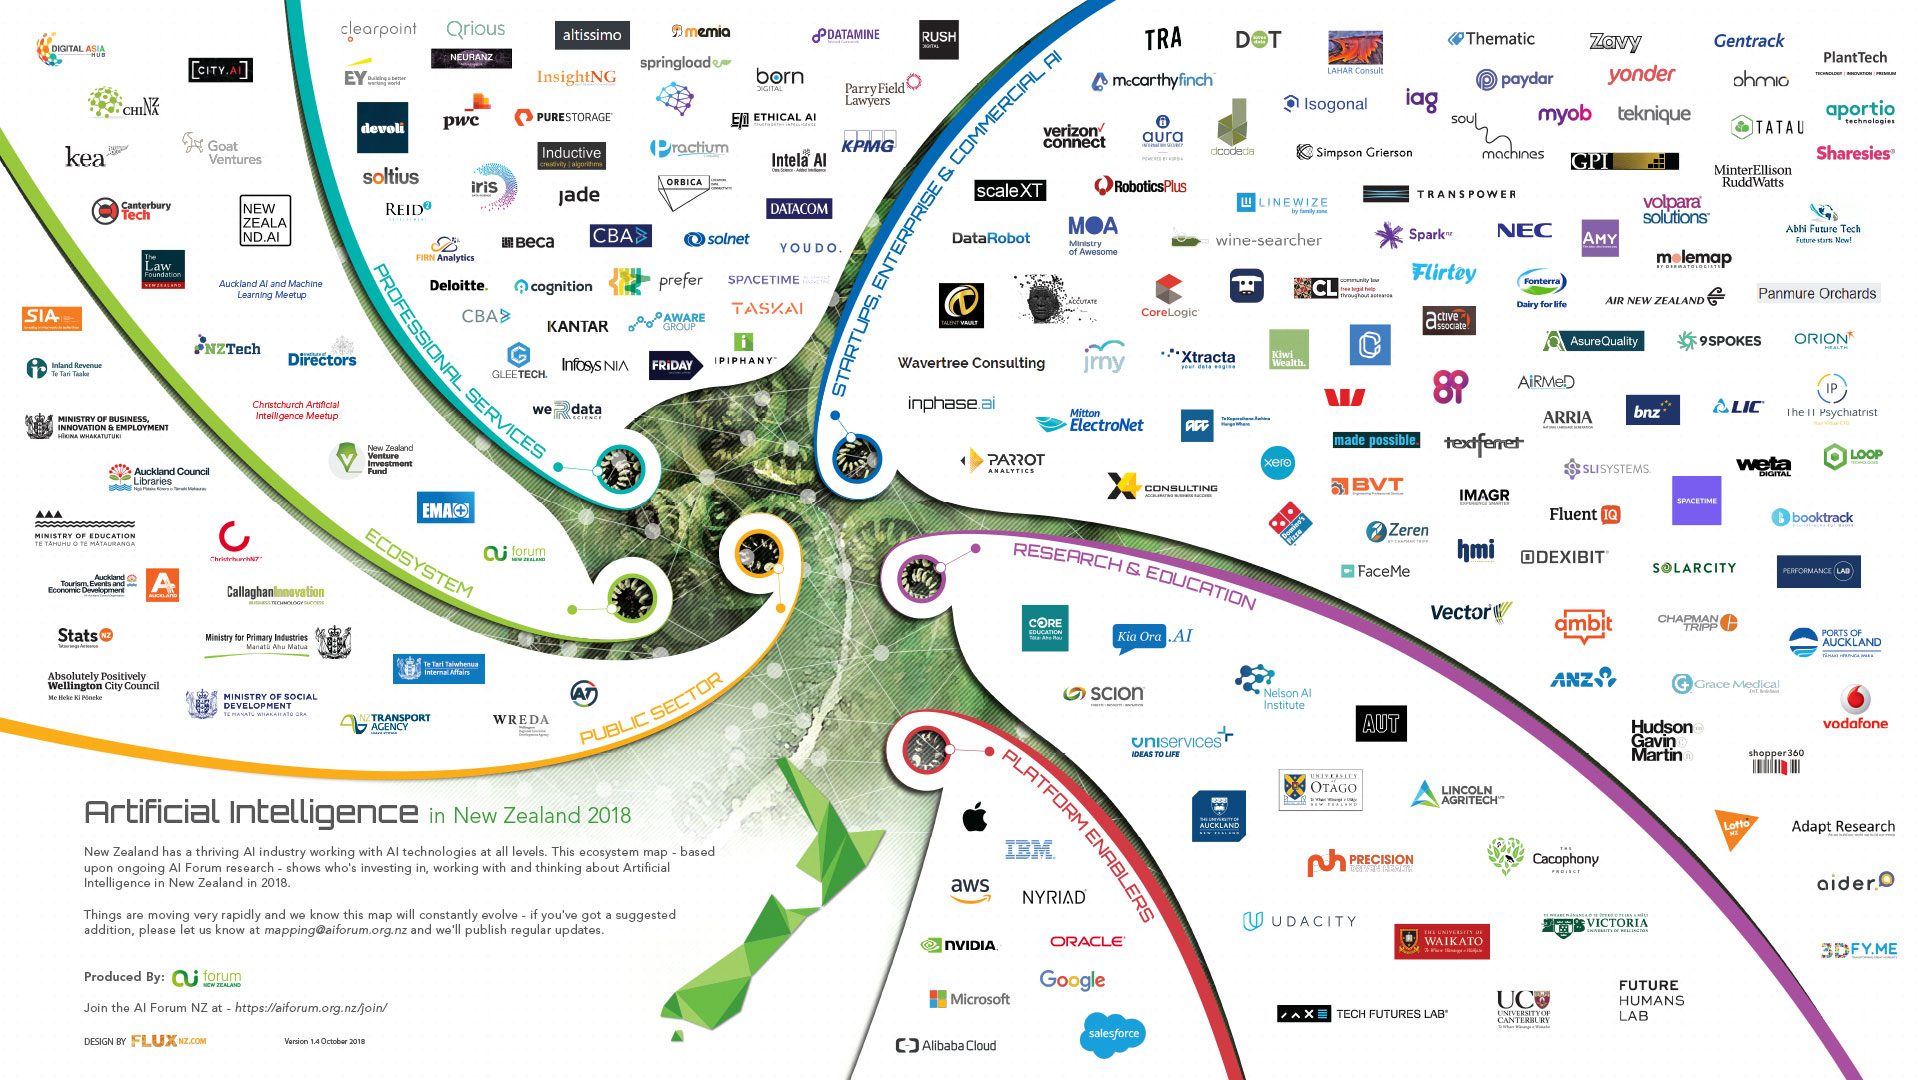

### 1.3 Size of data science team

Approximately how many individuals are responsible for data science workloads in companies of different sizes? For small companies with 0-49 employees, 1-2 is the most frequent size of the data team. Some (perhaps data driven tech companies) have a larger team of 5-9 people. For companies with 50-249 employees, 1-4 is still the most common data team size. For larger companies (250-9999 employees), teams with 20+ people begin to occur, while the majority still have a team size of 1-9 people. Surprisingly, the companies with more than 10000 employees only have 0-4 individuals responsible for data science workloads based on this survey. These results suggest that data science is still not a commonly used tool for most of the businesses in New Zealand. The answers to Q8 - Does your current employer incorporate machine learning methods into their business? also confirm this observation. Most of the businesses are just exploring ML or have recently started using ML.

In [ ]:
#Q7: Approximately how many individuals are responsible for data science workloads at your place of business?
NZ['Q7_reformatted'] = NZ.Q7.apply(lambda x: '1-2' if x == '2-Jan' else '3-4' if x == '4-Mar' else '5-9' if x == '9-May' \
                                  else '10-14' if x == '14-Oct' else 'Not Available' if pd.isnull(x) else x)
NZ_compsize_numdataind = NZ.groupby(['Q6', 'Q7_reformatted']).Q1.count().reset_index()
NZ_compsize_numdataind.columns = ['Company size', 'Number of individuals', 'Count']

In [ ]:
fig = plt.figure(figsize=(15, 6))
ax = plt.subplot()
comp_size_ordered = ['Not Available', '0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '> 10,000 employees']
num_ind_ordered = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+', 'Not Available']
sns.barplot(data=NZ_compsize_numdataind, x='Company size', y='Count', hue='Number of individuals', order=comp_size_ordered, hue_order=num_ind_ordered)
plt.show()

In [ ]:
NZ.fillna(value={'Q8':'Not Available'}, inplace=True)
NZ_use_ML = NZ.groupby('Q8').Q1.count().reset_index()

fig = plt.figure(figsize=(8, 6))
plt.barh(NZ_use_ML.Q8, NZ_use_ML.Q1, edgecolor='black')
plt.xlabel('Company counts')
plt.show()

### 1.4 Daily tasks of data scientists

After 2 months of studying data science courses online, I am lucky enough to land my first internship in a company that specializes in NLP software. Before offcially starting the internship, I want to find out what people usually do in their data-related roles. By summarizing the answers to Q9 - Select any activities that make up an important part of your role at work, the following table was produced listing the data-related tasks of the surveyees in a descending order of popularity. It turns out that analyzing and understanding data to influence product or business decisions is the most common task, as expected. What comes second is building prototypes to explore applying machine learning to new areasis, which reflects the overall active to explore attitude of the NZ businesses toward Machine Learning, in accordance with the observation made from the previous question. The next three common tasks, namely buildinng and/or running a machine learning service that operationally improves my product or workflows, experimentation and iteration to improve existing ML models, and building and/or running the data infrastructure that my business uses for storing, analyzing, and operationalizing data, sound more like routine tasks of running ML software bought from other companies and maintaining company databases, etc.

In [ ]:
def multiple_choice(df, q, n):
    dataframe = pd.DataFrame(columns=['col1', 'col2'])
    for i in range(n):
        data = pd.DataFrame([[df['Q{}_Part_{}'.format(q, i+1)].dropna().iloc[0], df['Q{}_Part_{}'.format(q, i+1)].count()]], \
                           columns=['col1', 'col2'])
        dataframe = dataframe.append(data, ignore_index=True)
    return dataframe

NZ_Q9_answers_count = multiple_choice(NZ, 9, 8)
NZ_Q9_answers_count.columns=['Activity', 'Count']
NZ_Q9_answers_count.sort_values(by=['Count'], ascending=False, inplace=True)
NZ_Q9_answers_count.index = range(8)
NZ_Q9_answers_count.style
NZ_Q9_answers_count.style

### 1.5 Job titles and salary ranges

The job titles reported by the surveyees and their relative percentages are shown in the pie chart below. The most common title is Product/Project Manager, which accounts for 25.5% among all reported job titles. People with this title are more likely to adopt data science and machine learning as a new approach to their work. Other common job titles include Data Scientist (15.7%), Business Analyst (11.8%), and Data Engineer (9.8%). These are indeed quite common positions to be found when searching data science on job sites. Interestingly, quite a number of surveyees reported themselves as not employed (13.7%) or other (11.8%). According to the 'other_text_responses.csv' file, the people who chose other didn't specify what other means. Those who classied themselves as not employed may be people like me: university or higher degree graduates who are seeking to change their major, stay-at-home moms, young entrepreneurs, and so on. 

In [ ]:
# Job titles of the NZ respondents
NZ_job_titles = NZ.groupby('Q5').Q1.count().reset_index()
print(NZ_job_titles)

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.pie(NZ_job_titles.Q1, labels=NZ.Q5.unique(), autopct='%0.2f%%')
plt.axis('equal')
plt.show()

In [ ]:
# What are the job titles in other? None of them is specified.
NZ_Q5_other_index = mcr[(mcr.Q3 == 'New Zealand') & (mcr.Q5 == 'Other')].index.values
NZ_Q5_other_text = otr.loc[NZ_Q5_other_index].Q5_OTHER_TEXT
print(NZ_Q5_other_text)

39 out of the 51 surveyees reported their annual salary. The salary distribution is shown in the bar chart below. Those whose annual salary is less than 20,000 USD may be scholarship receiving students. Those between 20,000 to 40,000 USD may be contractors or casual workers. A graduate or junior position in this industry usually earns between 40,000 to 60,000 USD. An intermediate position 60,000 to 80,000 USD. A senior position 80,000 to 100,000 USD. People at management level may earn more than 100,000 USD per year. The distribution shows that the majority of the surveyees are probably at a junior or intermediate level of their career. Some are more senior, and a few may not have a full-time job.

In [ ]:
NZ_salary = NZ.groupby('Q10').Q1.count().reset_index()
NZ_salary.iloc[0,0] = '0-999'

NZ_grouped_salary = pd.DataFrame([['less than 20k', 4], ['20k-40k', 1], ['40k-60k', 9], ['60k-80k', 11], \
                                 ['80k-100k', 6], ['more than 100k', 8]], columns=['Salary range', 'Count'])

fig = plt.figure(figsize=(8, 6))
plt.bar(data=NZ_grouped_salary, x='Salary range', height='Count', edgecolor='black')
plt.xlabel('Salary range in USD')
plt.ylabel('Count')
plt.show()

## 2. Australia included

### 2.1 Learning platforms

Again, as a beginner data science learner, I would like to know the answers to Q13: On which platforms have you begun or completed data science courses? and Q19: What programming language would you recommend an aspiring data scientist to learn first? These questions are better answered by a larger survey sample. Therefore, I included all surveyees from Australia in my dataset, given the close relationship and similar economic environment between these two countries. The number of responses from Australia and New Zealand is 320 altogether.

In [ ]:
AUSNZ = mcr[(mcr.Q3 == 'Australia') | (mcr.Q3 == 'New Zealand')]
print(len(AUSNZ))

The platforms on which the surveyees have begun or completed data science courses are summarized in a bar chart with ascending popularity. The most popular platform is Coursera, which provides a large number of open online courses, specializations, and degrees. It's an ideal place to learn at a self-controlled pace without the trouble to travel to a campus or stick to fixed timetables. When I checked out its website, I found that most degrees were offered by renowned universites and as a result, cost a lot. That's the main reason why I personally didn't choose this platform to start my data science learning journey. The second most popular learning source is university courses. More and more universities are providing data science related degrees at both undergraduate and postgraduate levels. But what dominates in data science learning is still online resources - and I'm surprised by the variety of these sources. Personally, I'm learning with Udacity and Codecademy. Codecademy is not listed here, but it's an affordable learning platform for total beginners. 

In [ ]:
AUSNZ_Q13_answers_count = multiple_choice(AUSNZ, 13, 12)
AUSNZ_Q13_answers_count.columns = ['Source', 'Count']
AUSNZ_Q13_answers_count.sort_values(by=['Count'], ascending=False, inplace=True)
AUSNZ_Q13_answers_count.index = range(12)
print(AUSNZ_Q13_answers_count)

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.barh(AUSNZ_Q13_answers_count.Source, AUSNZ_Q13_answers_count.Count, edgecolor='black')
plt.show()

### 2.2 Recommended and used programming languages

The most recommended to-learn-first language in data science is Python, which is totally within my expectation. R and SQL are also popular. As comparison, the languages used by dats scientists daily are listed in the second table below. With Python, SQL, and R still being the most popular languages, many use Bash and Javascript, too. With not a few answered 'Other', I looked into the 'other_text_responses.csv' file and found the two specified 'Other' answers were Golang and Scala, which I have not heard of before. 

In [ ]:
AUSNZ_reclan = AUSNZ.groupby('Q19').Q1.count().reset_index()
AUSNZ_reclan.columns = ['Recommendation', 'Count']
AUSNZ_reclan.sort_values(by=['Count'], ascending=False, inplace=True)
AUSNZ_reclan.index = range(10)
AUSNZ_reclan.style

In [ ]:
AUSNZ_Q18_answers_count = multiple_choice(AUSNZ, 18, 12)
AUSNZ_Q18_answers_count.columns = ['Language', 'Count']
AUSNZ_Q18_answers_count.sort_values(by=['Count'], ascending=False, inplace=True)
AUSNZ_Q18_answers_count.index = range(12)
AUSNZ_Q18_answers_count.style

In [ ]:
AUSNZ_Q18_other_index = mcr[((mcr.Q3 == 'New Zealand') | (mcr.Q3 == 'Australia')) & (mcr.Q18_Part_12 == 'Other')].index.values
AUSNZ_Q18_other_text = otr.loc[AUSNZ_Q18_other_index].Q18_OTHER_TEXT
print(AUSNZ_Q18_other_text.unique())

# Conclusion

I enjoyed all the questioning and exploring in this data analysis quest because it is closely related to my life and career plan. As a beginner in the field of data science, I find myself to be lacking in both domain knowledge and programming skills to discover more insight from other questions. But what I have done here is beyond imagination to the two-month-ago me, which encourages me to keep learning with great passion. I wish every reader of this kerner who is a beginner like me can be inspired and encouraged on your learning journey, too. Again, thank you for reading and please pardon my immature coding style and English language skills. Any comment on possible improvement is welcome!